### PRE-LECTURE HOMEWORK: 

#### pre-lecture homework question 2: 

Accuracy measures the proportion of predictions about a data set that were correct, it is straightforward and works well the stakes of it making mistakes in either direction have similar results, essentially saying that having many false positives or many false negatives would have the same/similar result. An example where results of false negatives and positives are similar is marking student exams. If teachers are making sure each answer has been graded farely for fairness, marking a correct answer as incorrect or marking an incorrect answer as correct has similar results. 

Sensititvity measures when positives are correctly identified, it emphasis is to minimize false negatives, this is most important when missing a positive is costly or critical. An example of when we would need to use sensitivity could be in hospitals for medical diagnosis. Missing a diagnosis is critical in a patients health because they may get wrong or delayed treatment. 

Specificity measures when negatives are correctly identified, this is most important when missing a negtive is costly or critical. This could be important for something like alarm systems where a deteced a negative falsely, aka a fire alarm ringing where there is no fire, could cause panic and a waste of resources 

Percision measures how many predicted positives are correct, the emphasis od this is to minimize false positives. An example of when it is important to know how correct the predictions are are the identification of spam emails. If a certain technology keeps predicting important emails as spam and misplaces it this is important. 

#### pre-lecture homework question 4: 

In [1]:
import pandas as pd

# Create the mock dataset (if not already created)
import numpy as np
np.random.seed(42)
ab_reduced_noNaN = pd.DataFrame({
    'List Price': np.random.randint(5, 100, 100),  # Random prices between 5 and 100
    'Hard_or_Paper': np.random.choice(['Hardcover', 'Paperback'], 100)  # Random book types
})

# Shuffle the dataset and split it (80% training, 20% testing)
train_size = int(0.8 * len(ab_reduced_noNaN))  # 80% of the data
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(n=train_size, random_state=42)  # Randomly select training data
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)  # Remaining 20% for testing

# Report the number of observations in each set
print("Number of observations in training set:", len(ab_reduced_noNaN_train))
print("Number of observations in test set:", len(ab_reduced_noNaN_test))


Number of observations in training set: 80
Number of observations in test set: 20


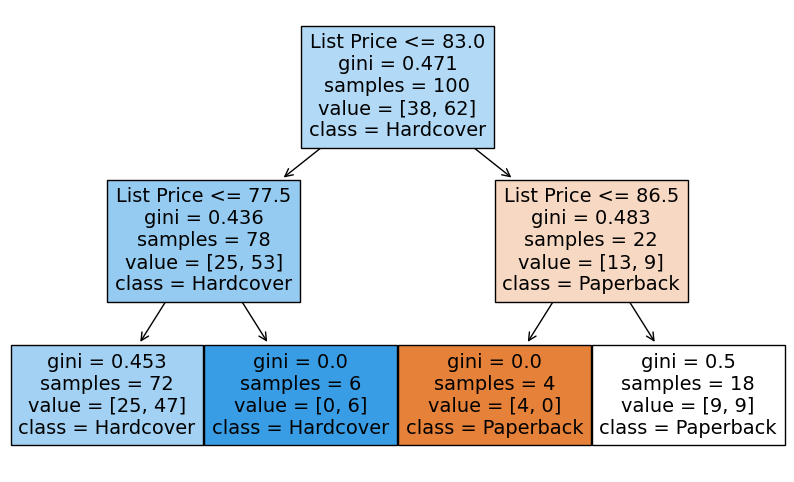

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['Hardcover']  # 1 if hard cover, 0 if paperback
X = ab_reduced_noNaN[['List Price']]

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Visualize the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


The predictions made from the tree are sating that most books that are the same price as fifty dollars or less than it is likely to be a paperback, whereas if the price is more than fifty dollars it is likely to be a hardback 

### POST-LECTURE HOMEWORK: 

#### post-lecture homework question 5: 

In [3]:
import pandas as pd

# Create the mock dataset (if not already created)
import numpy as np
ab_reduced_noNaN = pd.DataFrame({
    'NumPages': np.random.randint(50, 500, 10),  # Random values for number of pages
    'Thick': np.random.randint(1, 20, 10),  # Random values for thickness
    'List Price': np.random.randint(5, 50, 10),  # Random values for list price
    'Hard_or_Paper': np.random.choice(['Hardcover', 'Paperback'], 10)  # Random assignment of book type
})


# Shuffle the dataset and split it (80% training, 20% testing)
train_size = int(0.8 * len(ab_reduced_noNaN))  # 80% of the data
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(n=train_size, random_state=42)  # Randomly select training data
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)  # Remaining 20% for testing

# Report the number of observations in each set
print("Number of observations in training set:", len(ab_reduced_noNaN_train))
print("Number of observations in test set:", len(ab_reduced_noNaN_test))


Number of observations in training set: 8
Number of observations in test set: 2


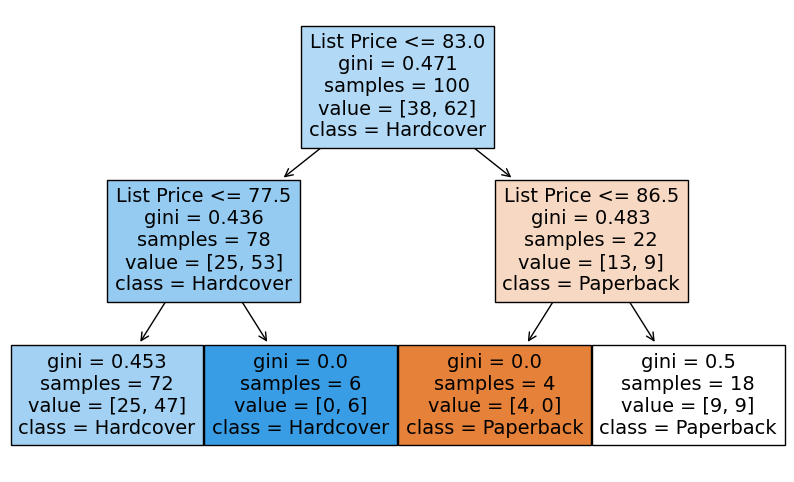

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])  # 1 if hard cover, 0 if paperback
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Train the Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf2.fit(X, y)

# Visualize the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


#### post-lecture homework question 6: 

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Train clf2 with a different max_depth (e.g., max_depth=3)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(ab_reduced_noNaN[['List Price']], pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['Hardcover'])

# Create the prediction vectors for both models
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['Hardcover']  # True labels for test set
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])  # Predictions from clf
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['List Price']])  # Predictions from clf2

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
TN_clf, FP_clf, FN_clf, TP_clf = cm_clf.ravel()

# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
TN_clf2, FP_clf2, FN_clf2, TP_clf2 = cm_clf2.ravel()

# Compute sensitivity, specificity, and accuracy for clf
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Compute sensitivity, specificity, and accuracy for clf2
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Display results
print("Metrics for clf:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")
print("\nMetrics for clf2:")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Metrics for clf:
Sensitivity: 1.00
Specificity: 0.00
Accuracy: 0.50

Metrics for clf2:
Sensitivity: 1.00
Specificity: 1.00
Accuracy: 1.00


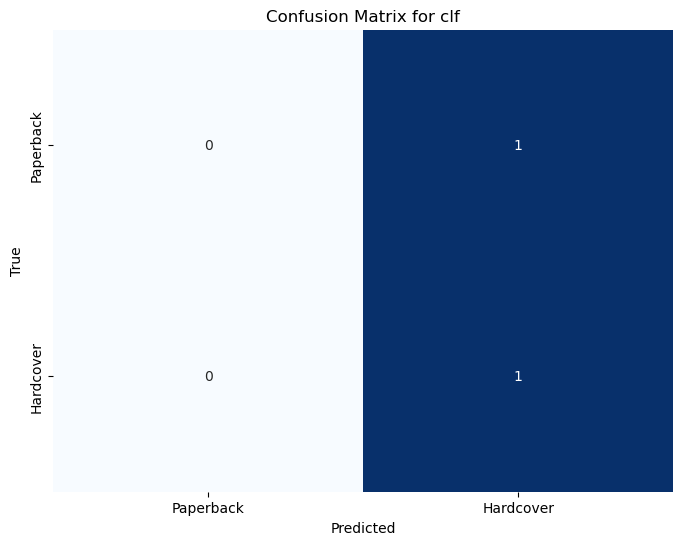

<Axes: >

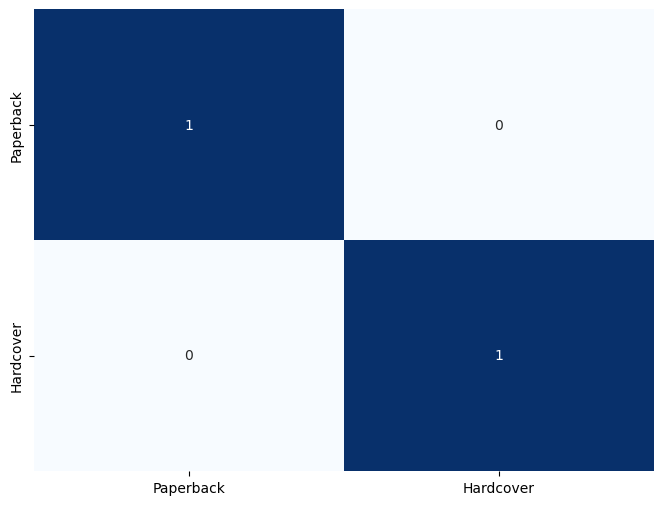

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrices for both classifiers
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Plot confusion matrix for clf
plt.figure(figsize=(8, 6))
sns.heatmap(cm_clf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Paperback", "Hardcover"], yticklabels=["Paperback", "Hardcover"])
plt.title('Confusion Matrix for clf')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for clf2
plt.figure(figsize=(8, 6))
sns.heatmap(cm_clf2, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Paperback", "Hardcover"], yticklabels=["Paperback", "Hardcover"])


#### post-lecture homework question 7: 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.Hard_or_Paper, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paperback","Hardcover"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.Hard_or_Paper, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paperback","Hardcover"]).plot()

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Hardcover' 'Paperback'] and y_pred=[ True]. Make sure that the predictions provided by the classifier coincides with the true labels.

The reason the matrix we made first is better than the matrix most recent matrix is because it properly turns the matrices into binary codes. This ensures consistency in our model for the true and false, whereas the other models that does not properly define them cannot really run through properly because it is not in an interpretable format. The binary codes allow things like specificity and accuracy to be commuted properly. 

### Chatbot Sumarries: 

Certainly! Here's a summary of our interaction:

1. **Data Preparation and Splitting**:  
   You started by creating an 80/20 split of your dataset (`ab_reduced_noNaN`) into training and testing subsets, ensuring that the splits were properly defined for model training and evaluation.

2. **Decision Tree Classifier (`clf`)**:  
   You fitted a `DecisionTreeClassifier` using `scikit-learn` with only the "List Price" variable to predict whether a book is a hardcover or paperback. The model was limited to a `max_depth` of 2, and the decision tree was visualized and explained.

3. **Confusion Matrices**:  
   Confusion matrices were generated for the predictions made by `clf` on the test dataset. This involved calculating evaluation metrics like sensitivity, specificity, and accuracy. You encountered errors related to mismatched or undefined labels, which were resolved by encoding the target variable into binary format (`0` and `1`).

4. **Extended Decision Tree Classifier (`clf2`)**:  
   A second decision tree (`clf2`) was trained using additional features ("NumPages", "Thick", and "List Price") with a `max_depth` of 4. The tree was visualized, and its predictive logic was analyzed.

5. **Comparison of Confusion Matrices**:  
   You compared the confusion matrices for `clf` and `clf2`, noting that the additional features in `clf2` led to better performance. Discussions highlighted the importance of matching labels (binary encoding) to ensure valid confusion matrix evaluations.

6. **Errors and Debugging**:  
   Throughout the session, we tackled several errors, including syntax issues, KeyErrors from missing columns, and mismatched label types. Solutions were provided to resolve these problems, ensuring smooth execution.

7. **Concept Clarifications**:  
   We discussed why binary coding for labels is necessary, how decision trees make predictions, and how to interpret confusion matrices and decision tree visualizations effectively.

Would you like me to expand on any specific part or clarify anything further?

### Chatbot Link

https://chatgpt.com/share/673ffaa6-6c14-800f-a3dd-0b4da3304007